# Exercise 6.4 Supervised Machine Learning

This script contains

1. Importing libraries
2. Data cleaning
3. Data prep
4. Regression analysis
5. Analysis without outliers

# 01. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# path to EPI folders
path = r"C:\Users\alabaro\OneDrive - DAI\Documents\EPI Analysis"

In [4]:
# import data file
df_epi_pop_gini = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'epi_pop_gini.pkl'))

# 02. Data cleaning

In [5]:
df_epi_pop_gini.columns

Index(['code', 'country_code', 'country_x', 'region', 'EPI.new', 'HLT.new',
       'AIR.new', 'HAD.new', 'PMD.new', 'OZD.new',
       ...
       'BCA.rnk.old', 'GHN.rnk.old', 'LCB.rnk.old', 'GIB.rnk.old',
       'GHP.rnk.old', 'country_name', 'pop_2022', '_merge', 'country_y',
       'gini'],
      dtype='object', length=284)

In [9]:
# create a subset

df = df_epi_pop_gini[['country_name', 'EPI.new', 'pop_2022']]

In [10]:
df.head()

,country_name,EPI.new,pop_2022
0,Afghanistan,43.6,41128771
1,Angola,30.5,35588987
2,Albania,47.1,2775634
3,United Arab Emirates,52.4,9441129
4,Argentina,41.1,46234830


In [11]:
df.shape

(179, 3)

In [12]:
# Check for missing values

df.isnull().sum()

country_name    0
EPI.new         0
pop_2022        0
dtype: int64

In [13]:
# check for dupicated values

dups = df.duplicated()

In [15]:
dups.shape

(179,)

No duplicates or missing values to address

C:\Users\alabaro\AppData\Local\Temp\ipykernel_22260\375440299.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['EPI.new'], bins=25) # Shows extreme values


<Axes: xlabel='EPI.new', ylabel='Density'>

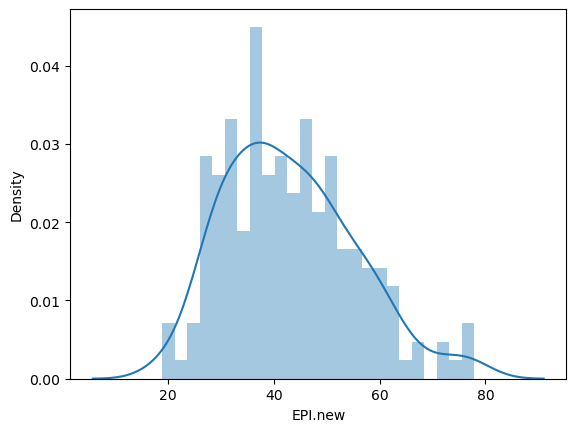

In [17]:
# extreme values check 

sns.distplot(df['EPI.new'], bins=25) # Shows extreme values

In [18]:
df['EPI.new'].mean() # Check the mean

43.09106145251396

In [19]:
df['EPI.new'].median() # Check the median

41.9

In [20]:
df['EPI.new'].max() # Check the max

77.9

# 03. Prep for data analysis

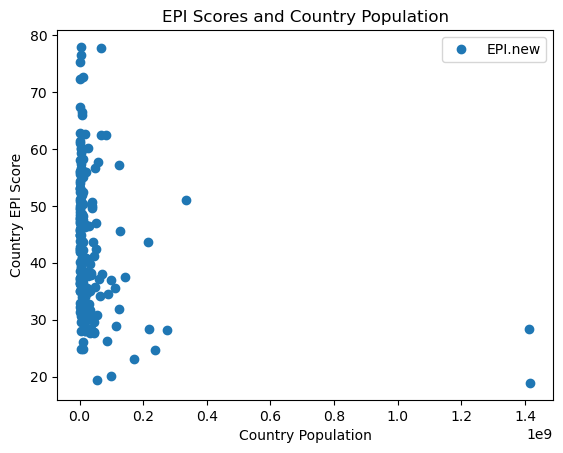

In [21]:
# Create a scatterplot using matplotlib

df.plot(x = 'pop_2022', y='EPI.new',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('EPI Scores and Country Population')  
plt.xlabel('Country Population')  
plt.ylabel('Country EPI Score')  
plt.show()

In [22]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['pop_2022'].values.reshape(-1,1)
y = df['EPI.new'].values.reshape(-1,1)

In [23]:
# check output

X

array([[  41128771],
       [  35588987],
       [   2775634],
       [   9441129],
       [  46234830],
       [   2780469],
       [     93763],
       [  25978935],
       [   9042528],
       [  10175016],
       [  12889576],
       [  11669446],
       [  13352864],
       [  22673762],
       [ 171186372],
       [   6465097],
       [   1472233],
       [    409984],
       [   3233526],
       [   9208701],
       [    405272],
       [  12224110],
       [ 215313498],
       [    281635],
       [    449002],
       [    782455],
       [   2630296],
       [   5579144],
       [  38929902],
       [   8769741],
       [  19603733],
       [1412175000],
       [  28160542],
       [  27914536],
       [  99010212],
       [   5970424],
       [  51874024],
       [    836774],
       [    593149],
       [   5180829],
       [  11212191],
       [   1251488],
       [  10526073],
       [  84079811],
       [   1120849],
       [     72737],
       [   5903037],
       [  112

In [24]:
# check output

y

array([[43.6],
       [30.5],
       [47.1],
       [52.4],
       [41.1],
       [48.3],
       [52.4],
       [60.1],
       [66.5],
       [38.6],
       [30.5],
       [58.2],
       [29.6],
       [35.5],
       [23.1],
       [51.9],
       [42. ],
       [56.2],
       [39.4],
       [48.5],
       [50. ],
       [40.1],
       [43.6],
       [53.2],
       [45.7],
       [42.5],
       [54. ],
       [44.9],
       [50. ],
       [65.9],
       [46.7],
       [28.4],
       [32.8],
       [30.2],
       [36.9],
       [40.1],
       [42.4],
       [42.5],
       [41.9],
       [46.3],
       [47.5],
       [58. ],
       [59.9],
       [62.4],
       [47.5],
       [51.2],
       [77.9],
       [42.2],
       [29.6],
       [46.5],
       [35.5],
       [31.7],
       [56.6],
       [61.4],
       [31.8],
       [76.5],
       [31.3],
       [62.5],
       [37.4],
       [49.7],
       [77.7],
       [39.1],
       [27.7],
       [31.6],
       [36.4],
       [40.2],
       [44

In [25]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 04. Regression analysis

In [26]:
# Create a regression object

regression = LinearRegression()

In [27]:
# Fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [28]:
# Predict the values of y using X

y_predicted = regression.predict(X_test)

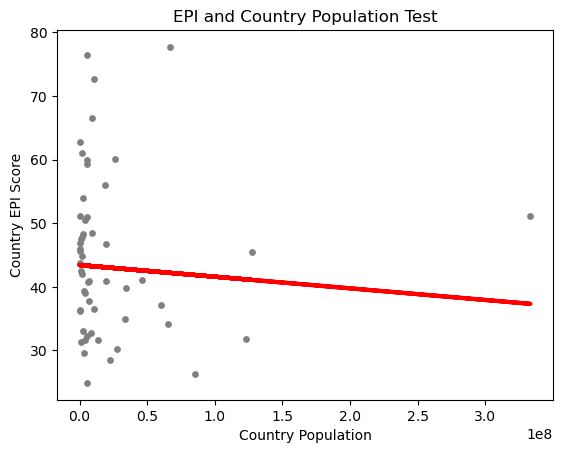

In [29]:
# Create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('EPI and Country Population Test')
plot_test.xlabel('Country Population')
plot_test.ylabel('Country EPI Score')
plot_test.show()

In [30]:
# Create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) # mean squared error
r2 = r2_score(y_test, y_predicted) # R2 score 

In [31]:
# Model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.82874033e-08]]
Mean squared error:  156.6096351020524
R2 score:  -0.019912204682921653


Slope is negative
Mean squared error is large (156) data points are very far from the regression line
r2 is -1.9 - which means the regression line is worse fit than a horizontal line 

Slope is negative - there is a negative relationship between a country's population and it's EPI score
The mean squared error is large (156) distance between the data points and the line are quite large
r2 is -1.9% - the model fits worse than a negative line

In [32]:
y_predicted

array([[43.07217713],
       [42.94375807],
       [43.31904864],
       [43.22805541],
       [43.29484313],
       [37.32388137],
       [43.40184232],
       [43.31575883],
       [43.41689117],
       [43.41808514],
       [42.90836095],
       [43.22706641],
       [43.31951269],
       [43.36799777],
       [43.35971253],
       [42.3235417 ],
       [41.85817564],
       [43.40754298],
       [43.4035429 ],
       [43.29177728],
       [43.35669804],
       [42.19411213],
       [43.16539397],
       [42.57333035],
       [43.39084651],
       [41.08712598],
       [43.40757738],
       [42.2210616 ],
       [43.30296917],
       [43.35095331],
       [43.39834791],
       [43.37074404],
       [43.41477854],
       [42.79616678],
       [43.38821561],
       [43.25348097],
       [43.31722442],
       [42.79820339],
       [43.41751516],
       [43.41186137],
       [43.38440322],
       [43.41063425],
       [43.06034396],
       [43.31845226],
       [41.1625469 ],
       [43

In [33]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,56.0,43.072177
1,60.1,42.943758
2,59.3,43.319049
3,36.5,43.228055
4,40.9,43.294843
5,51.1,37.323881
6,31.3,43.401842
7,50.9,43.315759
8,43.8,43.416891
9,36.2,43.418085


Looking at actual and predicted values, there are significant differences between both. 
Data does not follow a straight line, so this model doesn't do a good job of predicting the relationship. 

In [34]:
# Predict the x_train
# Compare how the regression fits the training set 

y_predicted_train = regression.predict(X_train)

In [35]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [36]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.82874033e-08]]
Mean squared error:  137.99119715914628
R2 score:  0.0731873211194759


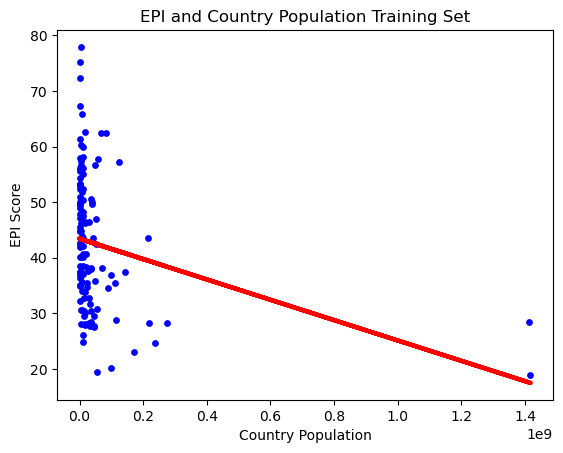

In [37]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='blue', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('EPI and Country Population Training Set')
plot_test.xlabel('Country Population')
plot_test.ylabel('EPI Score')
plot_test.show()

Interpretation: Regression line is not the best model for this set of data. Population is one variable that influences a country's EPI score, but we should consider other variables that could play a more significant role.
Other variables to consider: Gini score, a country's participation in the Paris Climate Agreement, # of climate related policies, government political type (i.e. liberal or conservative)

Potential Bias: The dataset is quite small, looking at data from 179 countries. Also, India and China have extremely large populations compared to all other countries which also skews the data. Since there are a limited number of countries, it might be better to identify trends over time. Environmental data is available from 1950 to 2022, which would provide a larger dataset. 

# 05. See what the data set looks like without the outliers - India and China

In [38]:
# Clean the extreme values from the country population

df_test = df[df['pop_2022'] <=1000000000] 

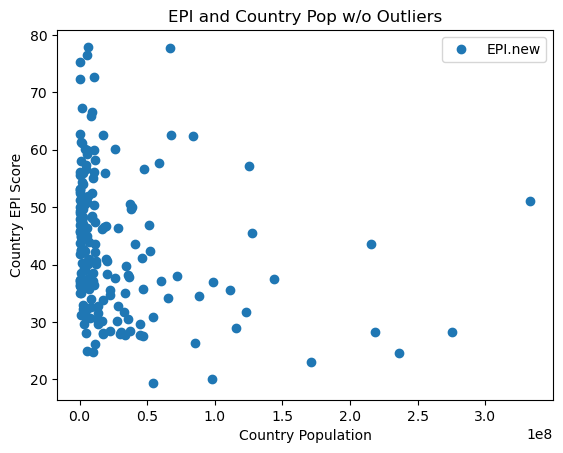

In [40]:
# See how the scatterplot looks without outliers

df_test.plot(x = 'pop_2022', y='EPI.new', style='o')  
plt.title('EPI and Country Pop w/o Outliers')  
plt.xlabel('Country Population')  
plt.ylabel('Country EPI Score')  
plt.show()

In [41]:
# Reshape variables

X_2 = df_test['pop_2022'].values.reshape(-1,1)
y_2 = df_test['EPI.new'].values.reshape(-1,1)

In [43]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [44]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [45]:
# Predict

y_predicted_2 = regression.predict(X_test_2)

In [46]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [47]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-7.86420049e-08]]
Mean squared error:  195.4852350952281
R2 score:  -0.07018677995899059


Slope is negative
Mean squared error is large (195) and much larger than data set with all data points included
r2 is -7 - which means the regression line is worse fit than a horizontal line 

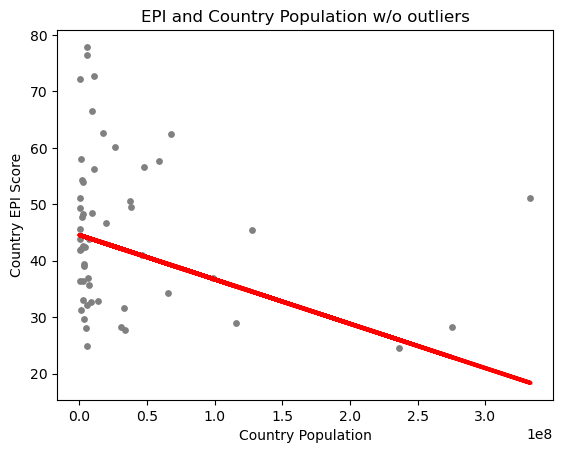

In [48]:
# Visualizing the test set results

plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('EPI and Country Population w/o outliers')
plot_test.xlabel('Country Population')
plot_test.ylabel('Country EPI Score')
plot_test.show()

In [49]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,76.5,44.124658
1,72.7,43.736949
2,36.4,44.348858
3,31.3,44.488544
4,28.3,42.159340
5,62.6,43.169456
6,60.1,42.518627
7,43.8,44.553259
8,54.3,44.399843
9,42.4,44.225950


There are large differences between the actual and predicted values. 
Linear regression is not the best model for this dataset. 